#1.단항 선형회귀 실습
* 한 개의 입력이 들어가서 한 개의 출력이 나오는 구조

In [4]:
import torch
import torch.nn as nn # 파이토치로 신경망(딥러닝) 모델을 만들수 있는애
import torch.optim as optim # 기울기를
import matplotlib.pyplot as plt


In [2]:
# 파이썬 코드를 재실해도 같은 결과가 나올 수 있도록 랜덤시드를 설정 해줌

torch.manual_seed(10)

In [3]:
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

print(x_train)
print(x_train.shape)
print(y_train)
print(y_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])
tensor([[2.],
        [4.],
        [6.]])
torch.Size([3, 1])


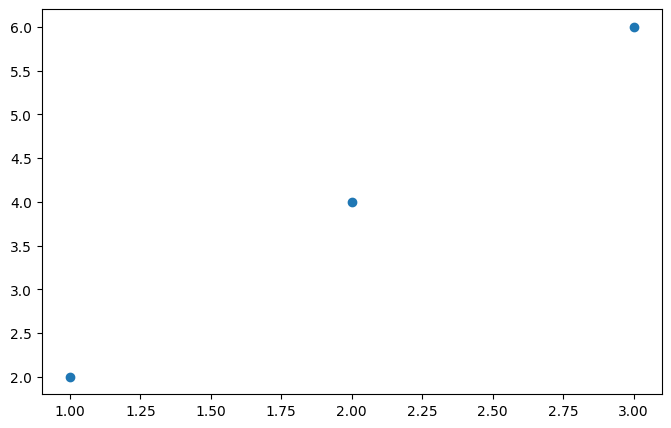

In [5]:
plt.figure(figsize=(8,5))
plt.scatter(x_train, y_train)

In [6]:
 # 가설의 공식을 만들수 있다.  H = Wx +b

 model = nn.Linear(1, 1)
 print(model)

Linear(in_features=1, out_features=1, bias=True)


In [7]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.0838]], requires_grad=True), Parameter containing:
tensor([-0.0343], requires_grad=True)]


In [8]:
# 비용 함수
# Cost Function = Loss Function

#학습을 하지 않고 바로 예측을 했기 때문에 신빙성은 전혀 없다.
y_pred = model(x_train)
print(y_pred)

tensor([[-0.1181],
        [-0.2019],
        [-0.2858]], grad_fn=<AddmmBackward0>)


In [9]:
# MSE
((y_pred - y_train)**2).mean()

tensor(20.5513, grad_fn=<MeanBackward0>)

In [10]:
# MSE
loss = nn.MSELoss()(y_pred, y_train)
loss

tensor(20.5513, grad_fn=<MseLossBackward0>)

In [11]:
# 데이터 [[1],[2],[3]]
# W: [[-0.0838]] , b: [-0.0343]
# pred: [[-0.1181],[-0.2019],[-0.2858]]

#pred값 실제 계산 해보기
print(-0.0838*1+-0.0343)
print(-0.0838*2+-0.0343)
print(-0.0838*3+-0.0343)

-0.1181


### 경사하강법(Gradient Descent)
* 비용 함수의 값을 최소로 하는 W와 b를 찾는 알고리즘을 옵티마이저 알고리즘라고 한다.
* 최적화 알고리즘
* 옵티마이저 알고리즘을 통해 W와 b를 찾아내는 과정을 학습이라고 부른다.
* 경사 하강법은 가장 기본적인 옵티마이저 알고리즘이라고 보면 된다.


![](https://i.imgur.com/0fW4LTG.png)

In [12]:
# lr 학습률(Learning rate) : 한번 움직이는 거리 (increment step)
optimizer = optim.SGD(model.parameters(), lr=0.01 )

In [14]:
loss = nn.MSELoss()(y_pred, y_train)


# 밑에 3개는 항상 붙어다니는 셋트
#gradient를 초기화
optimizer.zero_grad()  # 기존 optimizer가 가지고 있는 값을 초기화 해라 !
#비용 함수를 미분하여 gradient(기울기)계산
loss.backward()        # 미분을 취해서 기울기와 절편을 다시 찾아내는것
#W와b를 업데이트
optimizer.step()       #

# 이전 기울기와절편= W: [[-0.0838]] , b: [-0.0343]
# 다시 계산한 기울기와 절편= W: [[0.1120]], b: [0.0498]

print(list(model.parameters()))

In [17]:
# 학습(Training) (반복 훈련을 해야한다!)
# 반복 훈련을 하면서 틀린 W,b를 수정하여 오차를 계속 출여나감
# epochs: 반복 훈련 횟수
epochs = 1000

for epoch in range(epochs + 1):
  y_pred = model(x_train)
  loss = nn.MSELoss()(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print(f'Epoch {epoch}/{epoch} Loss: {loss:.6f}')

Epoch 0/0 Loss: 12.869220
Epoch 100/100 Loss: 0.047990
Epoch 200/200 Loss: 0.029655
Epoch 300/300 Loss: 0.018325
Epoch 400/400 Loss: 0.011324
Epoch 500/500 Loss: 0.006997
Epoch 600/600 Loss: 0.004324
Epoch 700/700 Loss: 0.002672
Epoch 800/800 Loss: 0.001651
Epoch 900/900 Loss: 0.001020
Epoch 1000/1000 Loss: 0.000630


In [19]:
# 가장 좋을때의 파라미터값
print(list(model.parameters()))

# W: [[1.9709]], b: [0.0661]

# 1.9709 * x + 0.0661

[Parameter containing:
tensor([[1.9709]], requires_grad=True), Parameter containing:
tensor([0.0661], requires_grad=True)]


In [21]:
x_test = torch.FloatTensor([[10],[12.1234]]) # 스칼라 2개짜리 답안지 만들기 [10],[12.1234]
y_pred = model(x_test) # 우리가 만든 model에 답안지를 넣고 예측 하기
print(y_pred) #우리가 만든 모델은 1개의 답안을 넣으면 1개의 값이 나온다.

tensor([[19.7752],
        [23.9602]], grad_fn=<AddmmBackward0>)


#2.다중 선형회귀
* 여러 개의 입력이 들어가서 한 개의 출력이 나오는 구조


In [23]:
# 직접 손으로 데이터 만들기
x_train = torch.FloatTensor([[73,80,75],
                             [93,88,93],
                             [89,91,90],
                             [96,99,100],
                             [73,66,70]])
y_train = torch.FloatTensor([[152],[185],[180],[196],[142]])


print(x_train)
print(x_train.shape)
print(y_train)
print(y_train.shape)

tensor([[ 73.,  80.,  75.],
        [ 93.,  88.,  93.],
        [ 89.,  91.,  90.],
        [ 96.,  99., 100.],
        [ 73.,  66.,  70.]])
torch.Size([5, 3])
tensor([[152.],
        [185.],
        [180.],
        [196.],
        [142.]])
torch.Size([5, 1])


In [24]:
# 가설
# H = W1x1 + w2x2 + w3x3 +b
model = nn.Linear(3,1) # 3개가 들어가서 1개가 나온다.
print(model)

Linear(in_features=3, out_features=1, bias=True)


In [25]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.2165,  0.1328, -0.3303]], requires_grad=True), Parameter containing:
tensor([-0.1018], requires_grad=True)]


In [26]:
# 옵티마이저
optimizer = optim.SGD(model.parameters(), lr=0.00001)

In [27]:
# 학습(Training) (반복 훈련을 해야한다!)
# 반복 훈련을 하면서 틀린 W,b를 수정하여 오차를 계속 줄여나감
# epochs: 반복 훈련 횟수
epochs = 1000

for epoch in range(epochs + 1):

  y_pred = model(x_train)
  loss = nn.MSELoss()(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print(f'Epoch {epoch}/{epoch} Loss: {loss:.6f}')

Epoch 0/0 Loss: 43253.566406
Epoch 100/100 Loss: 5.342067
Epoch 200/200 Loss: 5.067742
Epoch 300/300 Loss: 4.808324
Epoch 400/400 Loss: 4.563018
Epoch 500/500 Loss: 4.331030
Epoch 600/600 Loss: 4.111671
Epoch 700/700 Loss: 3.904230
Epoch 800/800 Loss: 3.708085
Epoch 900/900 Loss: 3.522605
Epoch 1000/1000 Loss: 3.347158


In [30]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.6860, 0.8253, 0.5005]], requires_grad=True), Parameter containing:
tensor([-0.0906], requires_grad=True)]


In [31]:
x_test = torch.FloatTensor([[82,92,82]])
y_pred = model(x_test)
print(y_pred)

tensor([[173.1330]], grad_fn=<AddmmBackward0>)


#문제
- temps.csv 데이터에서 기온에 다른 지면 온도를 예측해보자.

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [64]:
temps_df = pd.read_csv('/content/drive/MyDrive/7.머신러닝 딥러닝/실습데이터/temps.csv')

In [65]:
temps_df

,지점,지점명,일시,기온(°C),지면온도(°C)
0,232,천안,2020-01-01 01:00,-8.7,-2.9
1,232,천안,2020-01-01 02:00,-7.3,-2.4
2,232,천안,2020-01-01 03:00,-6.7,-2.2
3,232,천안,2020-01-01 04:00,-6.2,-2.0
4,232,천안,2020-01-01 05:00,-5.9,-1.9
...,...,...,...,...,...
8777,232,천안,2020-12-31 19:00,-6.6,-0.6
8778,232,천안,2020-12-31 20:00,-6.4,-0.7
8779,232,천안,2020-12-31 21:00,-7.3,-1.2
8780,232,천안,2020-12-31 22:00,-9.0,-1.5


In [66]:
temps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8782 entries, 0 to 8781
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   지점        8782 non-null   int64  
 1   지점명       8782 non-null   object 
 2   일시        8782 non-null   object 
 3   기온(°C)    8779 non-null   float64
 4   지면온도(°C)  8782 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 343.2+ KB


In [67]:
# 기온에 결측치 3개 삭제하기
temps_df = temps_df.dropna()
temps_df.isnull().sum()

지점          0
지점명         0
일시          0
기온(°C)      0
지면온도(°C)    0
dtype: int64

In [39]:
# 지점, 지점명 필요 없는 칼럼 삭제하기
temps_df.drop(['지점','지점명','일시'], axis=1)

,일시,기온(°C),지면온도(°C)
0,2020-01-01 01:00,-8.7,-2.9
1,2020-01-01 02:00,-7.3,-2.4
2,2020-01-01 03:00,-6.7,-2.2
3,2020-01-01 04:00,-6.2,-2.0
4,2020-01-01 05:00,-5.9,-1.9
...,...,...,...
8777,2020-12-31 19:00,-6.6,-0.6
8778,2020-12-31 20:00,-6.4,-0.7
8779,2020-12-31 21:00,-7.3,-1.2
8780,2020-12-31 22:00,-9.0,-1.5


In [42]:
temps_df['기온(°C)']

0      -8.7
1      -7.3
2      -6.7
3      -6.2
4      -5.9
       ... 
8777   -6.6
8778   -6.4
8779   -7.3
8780   -9.0
8781   -9.2
Name: 기온(°C), Length: 8782, dtype: float64

In [69]:
x_data = temps_df[['기온(°C)']]
y_data = temps_df[['지면온도(°C)']]

x_data = torch.FloatTensor(x_data.values)
y_data  = torch.FloatTensor(y_data .values)


print(x_data)
print(x_data.shape)
print(y_data)
print(y_data.shape)

tensor([[-8.7000],
        [-7.3000],
        [-6.7000],
        ...,
        [-7.3000],
        [-9.0000],
        [-9.2000]])
torch.Size([8779, 1])
tensor([[-2.9000],
        [-2.4000],
        [-2.2000],
        ...,
        [-1.2000],
        [-1.5000],
        [-1.2000]])
torch.Size([8779, 1])


In [70]:
# 그래프를 그려보겠습니다.
import matplotlib.pyplot as plt

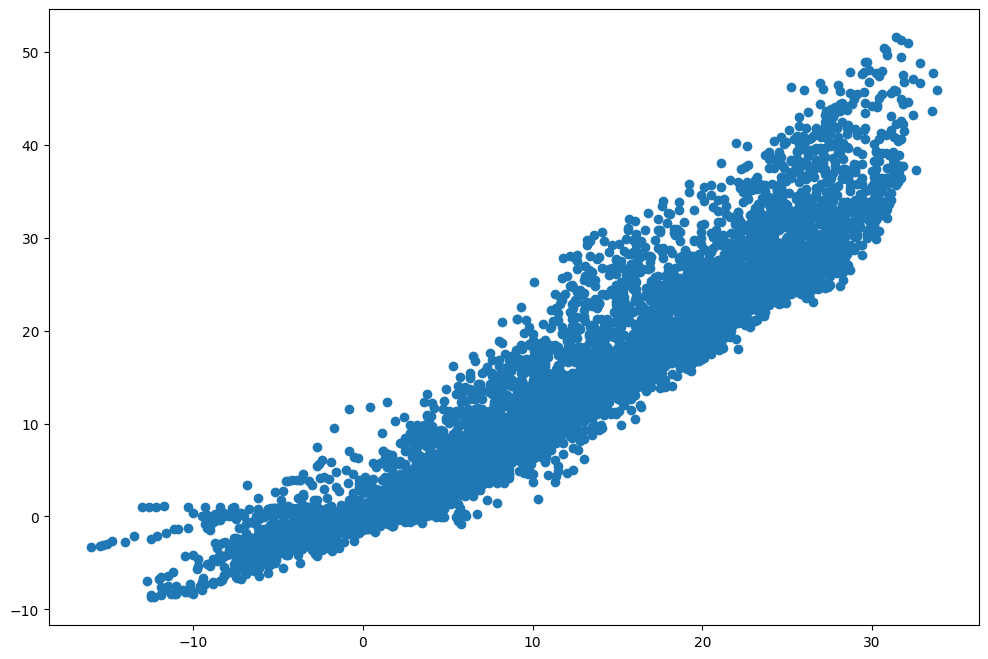

In [77]:
plt.figure(figsize=(12,8))
plt.scatter(x_data, y_data)

In [71]:
model = nn.Linear(1,1) # 1개가 들어가서 1개가 나온다.
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [72]:
# [[0.3876]],[0.9386]
print(list(model.parameters()))

[Parameter containing:
tensor([[0.0959]], requires_grad=True), Parameter containing:
tensor([-0.1121], requires_grad=True)]


In [73]:
# 학습(Training) (반복 훈련을 해야한다!)
# 반복 훈련을 하면서 틀린 W,b를 수정하여 오차를 계속 줄여나감
# epochs: 반복 훈련 횟수
epochs = 1000

for epoch in range(epochs + 1):

  y_pred = model(x_data)
  loss = nn.MSELoss()(y_pred, y_data)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print(f'Epoch {epoch}/{epoch} Loss: {loss:.6f}')

Epoch 0/0 Loss: 283.100433
Epoch 100/100 Loss: 13.225131
Epoch 200/200 Loss: 13.184873
Epoch 300/300 Loss: 13.150645
Epoch 400/400 Loss: 13.121546
Epoch 500/500 Loss: 13.096805
Epoch 600/600 Loss: 13.075770
Epoch 700/700 Loss: 13.057885
Epoch 800/800 Loss: 13.042681
Epoch 900/900 Loss: 13.029753
Epoch 1000/1000 Loss: 13.018761


In [74]:
# W,b확인하기
print(list(model.parameters()))

[Parameter containing:
tensor([[1.1044]], requires_grad=True), Parameter containing:
tensor([0.4285], requires_grad=True)]


In [75]:
y_pred = model(x_data).detach().numpy()
y_pred

array([[-9.179829 ],
       [-7.633658 ],
       [-6.9710126],
       ...,
       [-7.633658 ],
       [-9.51115  ],
       [-9.732032 ]], dtype=float32)

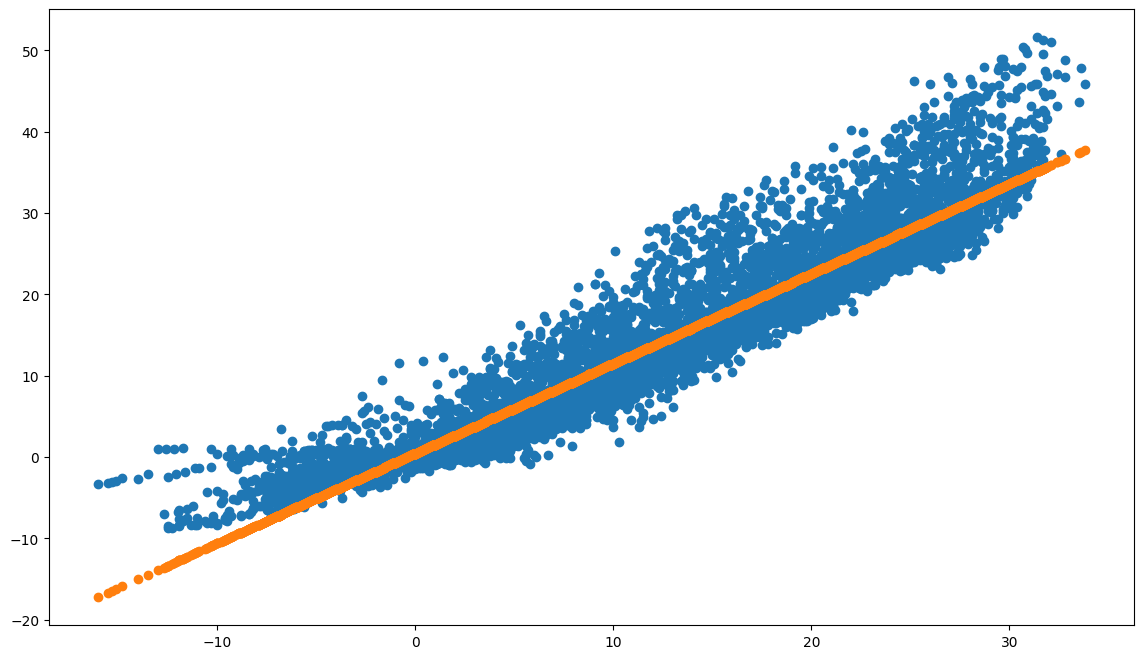

In [76]:
# 입력받은 데이터값
plt.figure(figsize=(14,8))
plt.scatter(x_data, y_data)

# 예측선
plt.scatter(x_data, y_pred)